# Group selfie

In [2]:
import pandas as pd
import random
import numpy as np
from sklearn.model_selection import train_test_split
import selfies as sf
import group_selfies as gsf
from rdkit import Chem

random.seed(42)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


# Input data

## Extract data from PsychLight file

In [3]:
# import data from PsychLight
PsychLight_data = pd.read_csv(
    "https://raw.githubusercontent.com/HauserGroup/PsyModTraining/refs/heads/main/data/PsychLight/PsychLight_TrainingSet.csv"
)
print(PsychLight_data.head())

   Class  Known         ID                                             SMILES
0      1  known       5-HT                         CN(C)CCc1c[nH]c2ccc(O)cc12
1      1  known        DMT                            CN(C)CCc1c[nH]c2ccccc12
2      1  known  25CN-NBOH                   COc1cc(CCNCc2ccccc2O)c(OC)cc1C#N
3      1  known        LSD  CCN(CC)C(=O)[C@@H]1C=C2c3cccc4[nH]cc(c34)C[C@H...
4      1  known  N-Me-5-HT                            CNCCc1c[nH]c2ccc(O)cc12


In [4]:
PsychLight_SMILES = PsychLight_data["SMILES"]
PsychLight_labels = PsychLight_data["Class"]

In [5]:
# split the dataset into training and test set
X = PsychLight_SMILES
y = PsychLight_labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Generate group selfie encoding

### Generate group grammar with X_train

In [6]:
# data preparation for fragmenting using X_train
X_train_SMILES_list = X_train.tolist()

print(X_train_SMILES_list)

['COc1ccc2[nH]cc(CCN(C)C)c2c1', 'C[C@H](N)Cc1ccccc1', 'CN(C)CCc1c[nH]c2ccc(O)cc12', 'CN[C@@H](C)Cc1ccc2c(c1)OCO2', 'CNCCc1c[nH]c2ccc(O)cc12', 'COC(=O)C(c1ccccc1)C1CCCCN1', 'C#CCN[C@@H]1CCc2ccc(OC(=O)N(C)CC)cc21', 'O=C(CCCN1CCC(O)(c2ccc(Cl)cc2)CC1)c1ccc(F)cc1', 'CN1CC[C@]23c4c5ccc(O)c4O[C@H]2[C@@H](O)C=C[C@H]3[C@H]1C5', 'COc1cccc([C@H](O)C2CCN(CCc3ccc(F)cc3)CC2)c1OC', 'CN(C)CCc1c[nH]c2cccc(OP(=O)(O)O)c12', 'CNCCc1c[nH]c2ccccc12', 'CN(C)CCc1c[nH]c2ccc(F)cc12', 'CNC1(c2ccccc2Cl)CCCCC1=O', 'COC(=O)[C@H]1[C@@H](OC(=O)c2ccccc2)C[C@@H]2CC[C@H]1N2C', 'CCCN(CCC)C1CCc2cccc(O)c2C1', 'COc1cc(CC(C)N)c(OC)cc1I', 'CN(C)CCc1c[nH]c2ccc(O)cc12', 'CN1CCN(C2=Nc3cc(Cl)ccc3Nc3ccccc32)CC1', 'C[C@H](N)Cc1ccc2c(c1)OCO2', 'COC(=O)[C@@H]1C[C@H](OC(C)=O)C(=O)[C@H]2[C@@]1(C)CC[C@H]1C(=O)O[C@H](c3ccoc3)C[C@]21C', 'COc1ccc2c(CCN(C)C)c[nH]c2c1', 'O=C(O)Cc1c[nH]c2ccccc12', 'CN(C)CCCN1c2ccccc2CCc2ccccc21', 'CN(C)CCc1c[nH]c2ccccc12', 'CC(=O)NCCc1c[nH]c2ccc(O)cc12', 'COc1cc(CCNCc2ccccc2O)c(OC)cc1C#N', 'CCN(CC)CCc1c[nH]c2

In [7]:
# generate grammar and dictionary of fragments

# get smiles list from PsychLight data
molecules = [Chem.MolFromSmiles(smiles) for smiles in X_train_SMILES_list]

# extracting a set of reasonable groups using fragmentation
fragments = gsf.fragment_mols(
    molecules, method="default")

# create a dictionary of fragments for tracking
vocab_fragment = dict(
    [(f"frag{idx}", gsf.Group(f"frag{idx}", frag)) for idx, frag in enumerate(fragments)]
) 

print(fragments)

  0%|          | 0/43 [00:00<?, ?it/s]

100%|██████████| 43/43 [00:00<00:00, 44.80it/s]

['C1=CC(*1)=CC=C1*1', 'C1=C2C(=C(*1)C(*1)=C1*1)C(*1)=CN2*1', 'C1=C2NC=C(*1)C2=C(*1)C(*1)=C1']


In [8]:
import group_selfies as gsf

# List all attributes and methods in the gsf module
print(dir(gsf))

# Check the documentation for fragment_mols
help(gsf.fragment_mols)


['Group', 'GroupGrammar', 'MolecularGraph', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', 'bond_constraints', 'constants', 'fragment_mols', 'get_alphabet_from_selfies', 'get_preset_constraints', 'get_semantic_constraints', 'get_semantic_robust_alphabet', 'grammar_rules', 'group_decoder', 'group_encoder', 'group_grammar', 'group_mol_graph', 'group_selfies', 'len_selfies', 'set_semantic_constraints', 'split_selfies', 'utils']
Help on function fragment_mols in module group_selfies.utils.fragment_utils:

fragment_mols(m_set, convert=False, n_limit=10, target=100, fragmented=False, method='default')



In [9]:
print(vocab_fragment)


{'frag0': <Group frag0 C1=CC(*1)=CC=C1*1>, 'frag1': <Group frag1 C1=C2C(=C(*1)C(*1)=C1*1)C(*1)=CN2*1>, 'frag2': <Group frag2 C1=C2NC=C(*1)C2=C(*1)C(*1)=C1>}


In [11]:
# create a GroupGrammar object using the predefined fragment vocabulary
grammar_auto = gsf.GroupGrammar(vocab=vocab_fragment)

test set origin smiles:  COc1ccc2c3c([nH]c2c1)CCN(C)CC3
test set origin:  <rdkit.Chem.rdchem.Mol object at 0x7fb638055eb0>


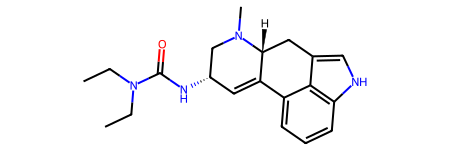

test set decoded smiles:  CCN(CC)C(=O)NC1C=C2c3cccc4[nH]cc(c34)CC2N(C)C1
test set decoded RWMol:  <rdkit.Chem.rdchem.RWMol object at 0x7fb638031540>
test set decoded from RWMol to Mol:  <rdkit.Chem.rdchem.Mol object at 0x7fb638055890>


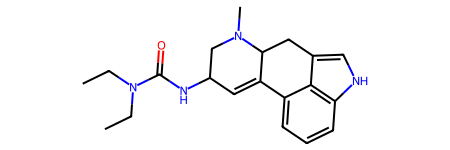

False

In [ ]:
# test the grammar on test set
from rdkit.Chem import MolToSmiles

test = Chem.MolFromSmiles(random.choice(X_test.tolist()))
print("test set origin smiles: ", random.choice(X_test.tolist()))
print("test set origin: ",test)
display(test)

# encode the molecules in the test set
test_encoded = grammar_auto.full_encoder(test)
# print(test_encoded)

# decode the molecule
test_decoded = grammar_auto.decoder(test_encoded)
print("test set decoded smiles: ", Chem.MolToSmiles(test_decoded.GetMol()))
print("test set decoded RWMol: ", test_decoded)
print("test set decoded from RWMol to Mol: ", test_decoded.GetMol())
display(test_decoded)

# original_smiles_1 = MolToSmiles(test, isomericSmiles=True, canonical=True)
# decoded_smiles_1 = MolToSmiles(test_decoded, isomericSmiles=True, canonical=True)
# # Chem.CanonSmiles(original_smiles_1) == Chem.CanonSmiles(decoded_smiles_1)

original_smiles_2 = MolToSmiles(test)
decoded_smiles_2 = MolToSmiles(test_decoded)
Chem.CanonSmiles(original_smiles_2) == Chem.CanonSmiles(decoded_smiles_2)

test set origin smiles:  C[C@@H](N)Cc1ccc2c(c1)OCO2
test set origin:  <rdkit.Chem.rdchem.Mol object at 0x7fb688d3c120>


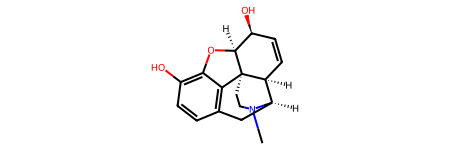

test set decoded smiles:  CN1CCC23c4c5ccc(O)c4OC2C(O)C=CC3C1C5
test set decoded RWMol:  <rdkit.Chem.rdchem.RWMol object at 0x7fb668b52860>
test set decoded from RWMol to Mol:  <rdkit.Chem.rdchem.Mol object at 0x7fb688d3cdd0>


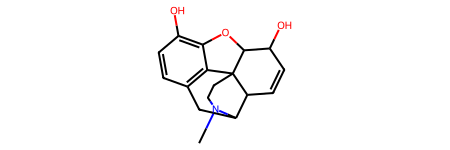

False

In [78]:
# test the grammar on test set
train = Chem.MolFromSmiles(random.choice(X_train.tolist()))
print("test set origin smiles: ", random.choice(X_train.tolist()))
print("test set origin: ", train)
display(train)

# encode the molecules in the test set
train_encoded = grammar_auto.full_encoder(train)
# print(test_encoded)

# decode the molecule
train_decoded = grammar_auto.decoder(train_encoded)
print("test set decoded smiles: ", Chem.MolToSmiles(train_decoded.GetMol()))
print("test set decoded RWMol: ", train_decoded)
print("test set decoded from RWMol to Mol: ", train_decoded.GetMol())
display(train_decoded)

original_smiles = MolToSmiles(train)
decoded_smiles = MolToSmiles(train_decoded)
Chem.CanonSmiles(original_smiles) == Chem.CanonSmiles(decoded_smiles)


### Group selfie encoding 

In [30]:
encode_input = [Chem.MolFromSmiles(smiles) for smiles in PsychLight_SMILES_list]
display(encode_input[0])
print(grammar_auto.full_encoder(encode_input[0]))
group_selfies = []


for smiles in encode_input:
    encode_mol = grammar_auto.full_encoder(smiles)
    group_selfies.append(encode_mol)
    
print(group_selfies)

NameError: name 'PsychLight_SMILES_list' is not defined

### One-hot encode group selfies

In [ ]:
# Tokenize the strings into individual tokens
tokens = set(token for smile in group_selfies for token in smile.split("]["))
tokens = {t.strip("[]") for t in tokens}  # Clean up brackets

# Assign indices to each token to build a vocabulary
vocab_token = {token: idx for idx, token in enumerate(sorted(tokens))}
print(vocab_token)

{'#Branch': 0, '#C': 1, '#N': 2, ':0frag0': 3, ':0frag2': 4, ':0frag3': 5, ':1frag1': 6, ':2frag1': 7, ':2frag2': 8, '=Branch': 9, '=C': 10, '=N': 11, '=O': 12, '=Ring1': 13, 'Br': 14, 'Branch': 15, 'C': 16, 'CH1': 17, 'Cl': 18, 'F': 19, 'I': 20, 'N': 21, 'O': 22, 'P': 23, 'Ring1': 24, 'Ring2': 25, 'S': 26, 'pop': 27}


In [ ]:
# Convert each string into a list of token indices
encoded_data = []
for smile in group_selfies:
    token_indices = [vocab_token[token.strip("[]")] for token in smile.split("][")]
    encoded_data.append(token_indices)
print(encoded_data)

[[3, 16, 7, 15, 22, 27, 27], [3, 16, 7, 27], [16, 22, 16, 10, 16, 15, 16, 16, 21, 16, 16, 10, 16, 10, 16, 10, 15, 22, 27, 24, 9, 27, 10, 15, 22, 16, 27, 16, 10, 15, 16, 2, 27, 25, 24, 9], [16, 16, 21, 15, 16, 16, 27, 16, 9, 12, 27, 17, 16, 10, 16, 10, 16, 10, 16, 21, 16, 10, 15, 16, 24, 21, 13, 15, 27, 16, 17, 15, 21, 15, 16, 27, 16, 25, 24, 25, 27, 24, 1], [16, 21, 16, 16, 7, 15, 22, 27], [21, 16, 16, 7], [3, 16, 7, 15, 22, 27, 27], [3, 16, 7, 25, 22, 27, 27], [16, 22, 6, 24, 3, 27], [16, 21, 16, 16, 7], [16, 17, 15, 21, 27, 16, 16, 10, 16, 10, 16, 9, 10, 24, 9, 27, 22, 16, 22, 24, 9], [16, 22, 16, 10, 16, 15, 16, 16, 15, 16, 27, 21, 27, 10, 15, 22, 16, 27, 16, 10, 15, 20, 27, 24, 1], [16, 16, 17, 16, 17, 16, 17, 16, 21, 16, 10, 16, 10, 15, 22, 27, 16, 10, 15, 16, 15, 16, 16, 21, 15, 16, 25, 24, 25, 27, 17, 25, 24, 0, 25, 24, 24, 27, 13, 11, 27, 24, 0], [16, 16, 17, 16, 17, 16, 17, 16, 21, 16, 10, 16, 10, 15, 22, 16, 27, 16, 10, 15, 16, 15, 16, 16, 21, 15, 16, 25, 24, 15, 27, 17, 25, 

In [ ]:
# Vocabulary size
vocab_size = len(vocab_token)

# Convert token indices to one-hot encoding
one_hot_data = []
for token_indices in encoded_data:
    one_hot_sequence = np.zeros((len(token_indices), vocab_size))
    for i, index in enumerate(token_indices):
        one_hot_sequence[i, index] = 1
    one_hot_data.append(one_hot_sequence)

print(len(one_hot_data))

54
